1/1 [==============================] - 0s 285ms/step


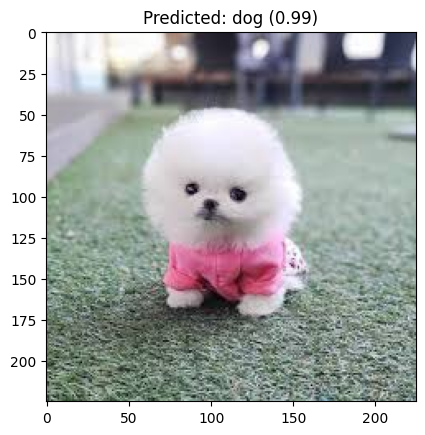

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the saved model
saved_model_path = 'D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\cats_vs_dogs_model.h5'
model = load_model(saved_model_path)

# Provide the path to the image you want to predict
img_path = 'D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\dog.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make prediction
prediction = model.predict(img_array)

# Determine the class
predicted_class = 'dog' if prediction[0][0] > 0.5 else 'cat'
confidence = prediction[0][0] if predicted_class == 'dog' else 1 - prediction[0][0]

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {predicted_class} ({confidence:.2f})')
plt.show()
